In [ ]:
!pip install catboost

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import xgboost as xgb

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.metrics import log_loss
from google.colab import files
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingRegressor
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from lightgbm.sklearn import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor

# Lectura de DataSets

In [ ]:
Data_train = pd.read_csv( "/content/drive/MyDrive/Orga Datos/TP2/Training.csv" )
Data_test = pd.read_csv( "/content/drive/MyDrive/Orga Datos/TP2/Test.csv" )
Data_train

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.5300,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.00,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.4800,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,3/21/2016,3/25/2016,2016 - 3,Q1,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245

In [ ]:
df = Data_train[ ['Region', 'Pricing, Delivery_Terms_Quote_Appr', 'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code', 'Delivery_Quarter', 'Delivery_Year', 'Total_Amount_Currency', 'Total_Amount', 'Stage', 'TRF' ] ]
test = Data_test[['Region', 'Pricing, Delivery_Terms_Quote_Appr', 'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code', 'Delivery_Quarter', 'Delivery_Year', 'Total_Amount_Currency', 'Total_Amount', 'TRF' ] ]
df_3 = pd.read_csv( "/content/drive/MyDrive/Orga Datos/TP2/DataFrame_train_encoded_2.csv" )
test_3 = pd.read_csv( "/content/drive/MyDrive/Orga Datos/TP2/DataFrame_test_encoded_2.csv" )

In [ ]:
opp_id = pd.DataFrame()
opp_id = test_3['Opportunity_ID']
df_3.drop(columns='Unnamed: 0', inplace=True)
test_3.drop(columns=['Opportunity_ID','Unnamed: 0'], inplace=True)
test_3


,Region_APAC,Region_Americas,Region_EMEA,Region_Japan,Region_Middle East,Total_Amount,TRF,"Pricing, Delivery_Terms_Approved","Pricing, Delivery_Terms_Quote_Appr"
0,0.0,0.0,1.0,0.0,0.0,11.905436,0.0,1.0,1.0
1,0.0,0.0,1.0,0.0,0.0,11.787392,0.0,1.0,1.0
2,0.0,1.0,0.0,0.0,0.0,9.954062,0.0,1.0,1.0
3,0.0,1.0,0.0,0.0,0.0,12.338534,1.0,1.0,1.0
4,0.0,1.0,0.0,0.0,0.0,8.657390,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1562,0.0,0.0,1.0,0.0,0.0,11.733987,0.0,1.0,1.0
1563,0.0,1.0,0.0,0.0,0.0,10.715637,0.0,1.0,1.0
1564,0.0,1.0,0.0,0.0,0.0,11.514145,0.0,1.0,1.0
1565,0.0,1.0,0.0,0.0,0.0,11.872137,0.0,1.0,1.0


# Tratando los datos

## Conversion a Dolar

In [ ]:
df.loc[df['Total_Amount_Currency'] == 'JPY', 'Total_Amount'] = df['Total_Amount']*0.0096
df.loc[df['Total_Amount_Currency'] == 'JPY', 'Total_Amount_Currency'] = 'USD'

df.loc[df['Total_Amount_Currency'] == 'EUR', 'Total_Amount'] = df['Total_Amount']*1.17
df.loc[df['Total_Amount_Currency'] == 'EUR', 'Total_Amount_Currency'] = 'USD'

df.loc[df['Total_Amount_Currency'] == 'AUD', 'Total_Amount'] = df['Total_Amount']*0.70
df.loc[df['Total_Amount_Currency'] == 'AUD', 'Total_Amount_Currency'] = 'USD'

df.loc[df['Total_Amount_Currency'] == 'GBP', 'Total_Amount'] = df['Total_Amount']*1.29
df.loc[df['Total_Amount_Currency'] == 'GBP', 'Total_Amount_Currency'] = 'USD'
df.drop('Total_Amount_Currency', axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [ ]:
test.loc[test['Total_Amount_Currency'] == 'JPY', 'Total_Amount'] = test['Total_Amount']*0.0096
test.loc[test['Total_Amount_Currency'] == 'JPY', 'Total_Amount_Currency'] = 'USD'

test.loc[test['Total_Amount_Currency'] == 'EUR', 'Total_Amount'] = test['Total_Amount']*1.17
test.loc[test['Total_Amount_Currency'] == 'EUR', 'Total_Amount_Currency'] = 'USD'

test.loc[test['Total_Amount_Currency'] == 'AUD', 'Total_Amount'] = test['Total_Amount']*0.70
test.loc[test['Total_Amount_Currency'] == 'AUD', 'Total_Amount_Currency'] = 'USD'

test.loc[test['Total_Amount_Currency'] == 'GBP', 'Total_Amount'] = test['Total_Amount']*1.29
test.loc[test['Total_Amount_Currency'] == 'GBP', 'Total_Amount_Currency'] = 'USD'
test.drop('Total_Amount_Currency', axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

## 1 y 0 en Target

In [ ]:
df = df.rename(columns={'Stage': 'Decision'})
df = df[ (df['Decision'] == 'Closed Won') | (df['Decision'] == 'Closed Lost') ]
df['Decision'] = np.where(df['Decision'] == 'Closed Won',1,0)
df.dropna(inplace=True)

## Normalizando Total Amount y TRF

In [ ]:
df = df[ df['Total_Amount'] > 0 ]
df['Total_Amount'] = np.log(df.Total_Amount)

## Encodideando categoricas

In [ ]:
#df['Delivery_Quarter_1'] = np.where(df['Delivery_Quarter'] == 'Q1',1,0)
#df['Delivery_Quarter_2'] = np.where(df['Delivery_Quarter'] == 'Q2',1,0)
#df['Delivery_Quarter_3'] = np.where(df['Delivery_Quarter'] == 'Q3',1,0)
#df['Delivery_Quarter_4'] = np.where(df['Delivery_Quarter'] == 'Q4',1,0)
df.drop('Delivery_Quarter', axis = 1, inplace = True)

In [ ]:
df['Region_Japon'] = np.where(df['Region'] == 'Japan',1,0)
df['Region_EMEA '] = np.where(df['Region'] == 'EMEA',1,0)
df['Region_Americas'] = np.where(df['Region'] == 'Americas',1,0)
df['Region_Apac'] = np.where(df['Region'] == 'APAC',1,0)
df['Region_Middle_East'] = np.where(df['Region'] == 'Middle East',1,0)
df.drop('Region', axis = 1, inplace = True)

In [ ]:
df['Bureaucratic_Code_1'] = np.where(df['Bureaucratic_Code'] == 'Bureaucratic_Code_1',1,0)
df['Bureaucratic_Code_2'] = np.where(df['Bureaucratic_Code'] == 'Bureaucratic_Code_2',1,0)
df['Bureaucratic_Code_3'] = np.where(df['Bureaucratic_Code'] == 'Bureaucratic_Code_3',1,0)
df['Bureaucratic_Code_4'] = np.where(df['Bureaucratic_Code'] == 'Bureaucratic_Code_4',1,0)
df['Bureaucratic_Code_5'] = np.where(df['Bureaucratic_Code'] == 'Bureaucratic_Code_5',1,0)
df.drop('Bureaucratic_Code', axis = 1, inplace = True)

In [ ]:
Data_train['Opportunity_Created_Date'] = pd.to_datetime(Data_train['Opportunity_Created_Date'], errors='coerce')
df['Mes_creada'] = Data_train['Opportunity_Created_Date'].dt.month

In [ ]:
#df['Delivery_Quarter_1'] = np.where(df['Delivery_Quarter'] == 'Q1',1,0)
#df['Delivery_Quarter_2'] = np.where(df['Delivery_Quarter'] == 'Q2',1,0)
#df['Delivery_Quarter_3'] = np.where(df['Delivery_Quarter'] == 'Q3',1,0)
#df['Delivery_Quarter_4'] = np.where(df['Delivery_Quarter'] == 'Q4',1,0)
test.drop('Delivery_Quarter', axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
test['Region_Japon'] = np.where(test['Region'] == 'Japan',1,0)
test['Region_EMEA '] = np.where(test['Region'] == 'EMEA',1,0)
test['Region_Americas'] = np.where(test['Region'] == 'Americas',1,0)
test['Region_Apac'] = np.where(test['Region'] == 'APAC',1,0)
test['Region_Middle_East'] = np.where(test['Region'] == 'Middle East',1,0)
test.drop('Region', axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
test['Bureaucratic_Code_1'] = np.where(test['Bureaucratic_Code'] == 'Bureaucratic_Code_1',1,0)
test['Bureaucratic_Code_2'] = np.where(test['Bureaucratic_Code'] == 'Bureaucratic_Code_2',1,0)
test['Bureaucratic_Code_3'] = np.where(test['Bureaucratic_Code'] == 'Bureaucratic_Code_3',1,0)
test['Bureaucratic_Code_4'] = np.where(test['Bureaucratic_Code'] == 'Bureaucratic_Code_4',1,0)
test['Bureaucratic_Code_5'] = np.where(test['Bureaucratic_Code'] == 'Bureaucratic_Code_5',1,0)
test.drop('Bureaucratic_Code', axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
Data_test['Opportunity_Created_Date'] = pd.to_datetime(Data_train['Opportunity_Created_Date'], errors='coerce')
test['Mes_creada'] = Data_train['Opportunity_Created_Date'].dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Encarando el modelo

In [ ]:
X = df_3.drop( 'Decision', axis=1 )
y = df_3['Decision']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
cbr = CatBoostRegressor(num_boost_round = 1500, learning_rate = 0.009)
cbr.fit(X_train, y_train)
cbr_pred = cbr.predict(X_test)


In [ ]:
loss = log_loss(y_test, cbr_pred)
print(f"Log loss is {loss}")

Log loss is 0.4350221468711731


['Region_APAC', 'Region_Americas', 'Region_EMEA', 'Region_Japan', 'Region_Middle East', 'Total_Amount', 'TRF', 'Pricing, Delivery_Terms_Approved', 'Pricing, Delivery_Terms_Quote_Appr']


Text(0.5, 0, 'Relative Importance')

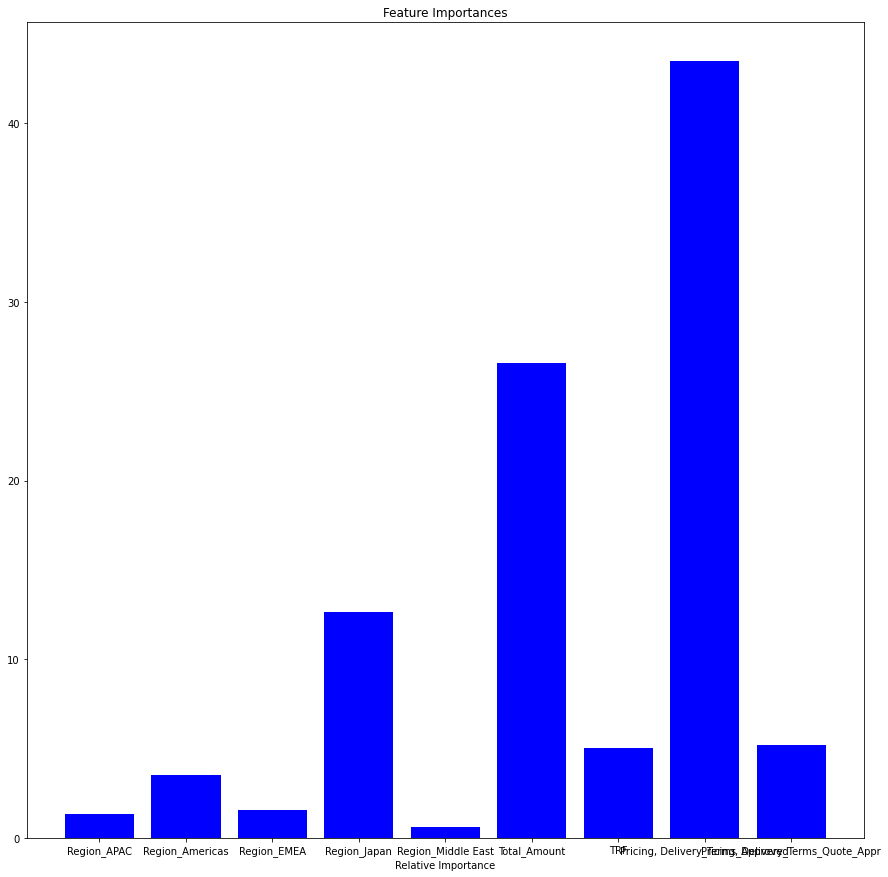

In [ ]:
features = X_test.columns.to_list()
importances = cbr.feature_importances_
indices = np.argsort(importances)

print(features)


plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.bar(features, importances, color='b', align='center')
plt.xlabel('Relative Importance')

# DataSet con las features de mas importancias

In [ ]:
df_re_loco = df[ ['Total_Amount', 'Delivery_Year', 'Bureaucratic_Code_5', 'Bureaucratic_Code_4', 'Region_Japon', 'Region_Americas', 'TRF', 'Decision', 'Mes_creada'] ]
test_re_loco = test[ ['Total_Amount', 'Delivery_Year', 'Bureaucratic_Code_5', 'Bureaucratic_Code_4', 'Region_Japon', 'Region_Americas', 'TRF', 'Mes_creada'] ]

In [ ]:
X_2 = df_re_loco.drop( 'Decision', axis=1 )
y_2 = df_re_loco['Decision']
#X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.3, random_state=123)


## CatBoost

In [ ]:
cbr_re_loco = CatBoostRegressor(num_boost_round = 1500, learning_rate = 0.008)
cbr_re_loco.fit(X_train, y_train)
cbr_pred = cbr_re_loco.predict(X_test)

0:	learn: 0.4938100	total: 3.1ms	remaining: 4.65s
1:	learn: 0.4924385	total: 5.71ms	remaining: 4.27s
2:	learn: 0.4910830	total: 8.69ms	remaining: 4.33s
3:	learn: 0.4897454	total: 11.7ms	remaining: 4.38s
4:	learn: 0.4883911	total: 14.6ms	remaining: 4.37s
5:	learn: 0.4870412	total: 17.7ms	remaining: 4.41s
6:	learn: 0.4856925	total: 20.4ms	remaining: 4.34s
7:	learn: 0.4843841	total: 24.6ms	remaining: 4.58s
8:	learn: 0.4830989	total: 27.7ms	remaining: 4.58s
9:	learn: 0.4818182	total: 31ms	remaining: 4.62s
10:	learn: 0.4805817	total: 33.6ms	remaining: 4.55s
11:	learn: 0.4793597	total: 36.4ms	remaining: 4.51s
12:	learn: 0.4781238	total: 38.9ms	remaining: 4.45s
13:	learn: 0.4768863	total: 41.6ms	remaining: 4.42s
14:	learn: 0.4756916	total: 44.4ms	remaining: 4.39s
15:	learn: 0.4745479	total: 47.2ms	remaining: 4.37s
16:	learn: 0.4733548	total: 49.8ms	remaining: 4.34s
17:	learn: 0.4721695	total: 52.4ms	remaining: 4.32s
18:	learn: 0.4710116	total: 55.4ms	remaining: 4.32s
19:	learn: 0.4698801	tota

Text(0.5, 1.0, 'CatBoost Regressor')

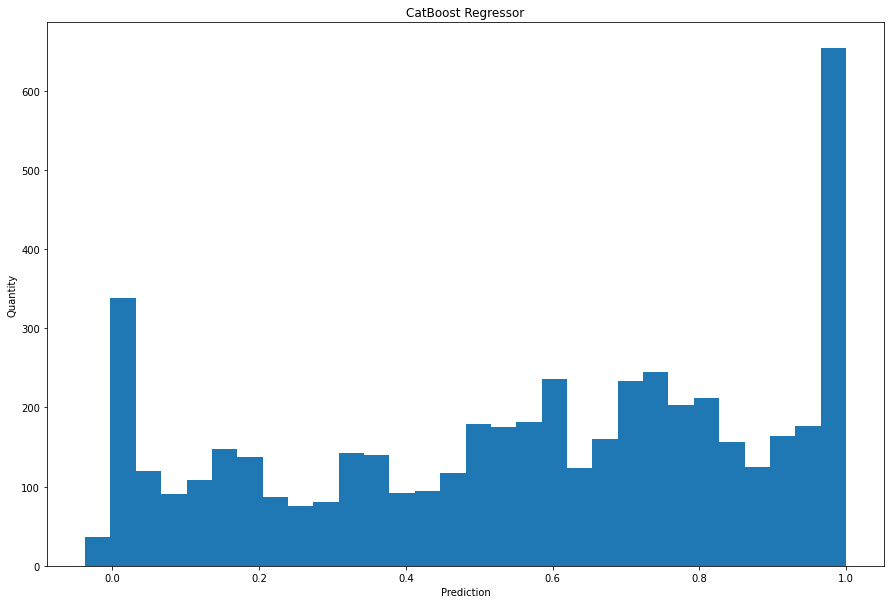

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(cbr_pred, bins=30)
plt.ylabel('Quantity')
plt.xlabel('Prediction')
plt.title('CatBoost Regressor')

In [ ]:
loss = log_loss(y_test, cbr_pred)
print(f"Log loss is {loss}")

Log loss is 0.43592547737429443


In [ ]:
cbr_re_loco.score(X_test, y_test)

0.4190773796590781

In [ ]:
features = X_test.columns.to_list()
importances = cbr_re_loco.feature_importances_
indices = np.argsort(importances)

print(features)


#plt.figure(figsize=(15,15))
#plt.title('Feature Importances')
#plt.bar(features, importances, color='b', align='center')
#plt.xlabel('Relative Importance')

['Region_APAC', 'Region_Americas', 'Region_EMEA', 'Region_Japan', 'Region_Middle East', 'Total_Amount', 'TRF', 'Pricing, Delivery_Terms_Approved', 'Pricing, Delivery_Terms_Quote_Appr']


## GXBoost

In [ ]:
xg_Regressor1 = xgb.XGBRegressor(colsample_bytree= 0.8, gamma= 1.5, learning_rate= 0.01, max_depth= 20, min_child_weight= 1, n_estimators= 200, subsample= 0.8)
xg_Regressor1.fit(X_train,y_train)
xgbr = xg_Regressor1.predict(X_test)


[23:39:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Text(0.5, 1.0, 'XGBoost Regressor')

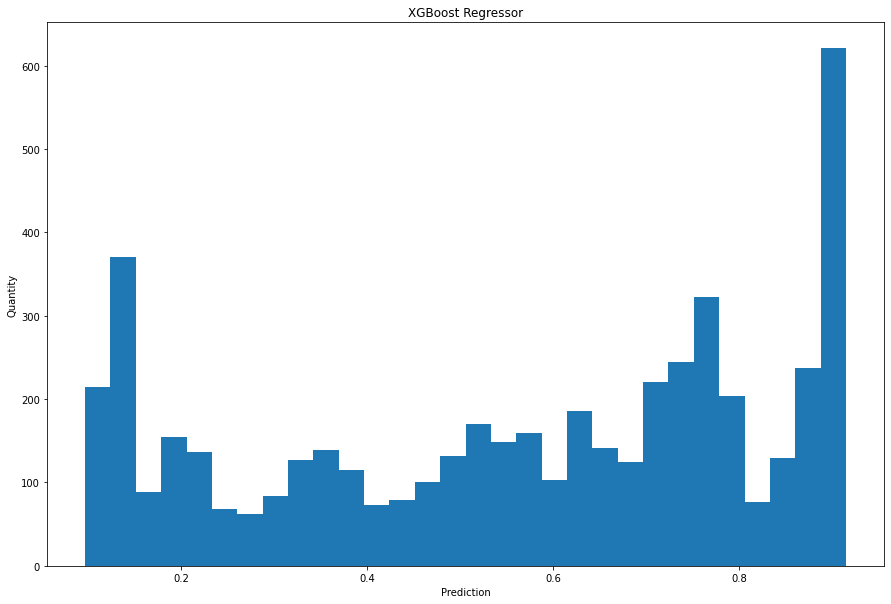

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(xgbr, bins=30)
plt.ylabel('Quantity')
plt.xlabel('Prediction')
plt.title('XGBoost Regressor')


In [ ]:
loss = log_loss(y_test, xgbr)
print(f"Log loss is {loss}")

Log loss is 0.44270637285983006


In [ ]:
xg_Regressor1.score(X_test, y_test)

0.42784605198508097

In [ ]:
xgbr_test = xg_Regressor1.predict(test_3)

## RandomForest


In [ ]:
rfr = RandomForestRegressor(n_estimators=200, oob_score=True, max_depth=5)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

Text(0.5, 1.0, 'RandomForest Regressor')

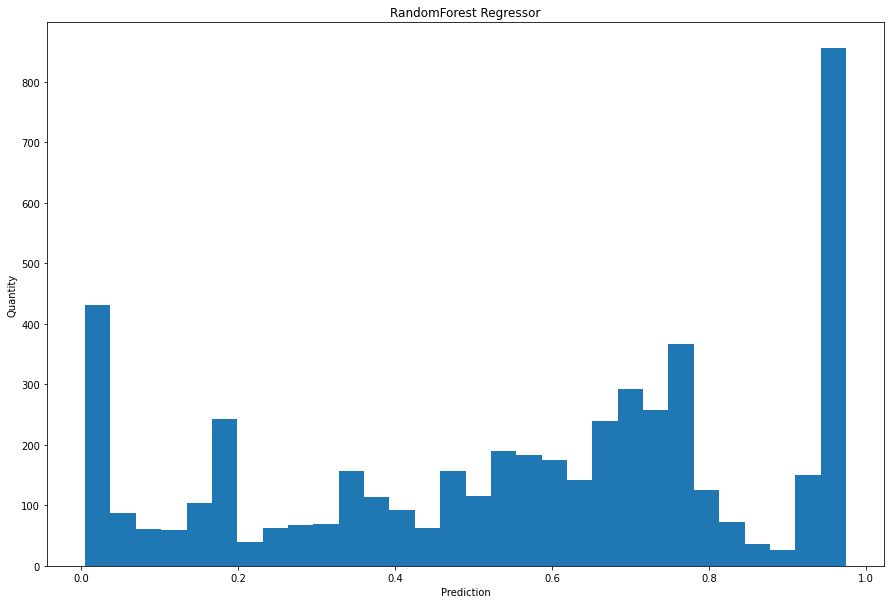

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(rfr_pred, bins=30)
plt.ylabel('Quantity')
plt.xlabel('Prediction')
plt.title('RandomForest Regressor')

In [ ]:
loss = log_loss(y_test, rfr_pred)
print(f"Log loss is {loss}")

Log loss is 0.4461158296879617


In [ ]:
#rfr.score(X_test, y_test)

## Ensamble

In [ ]:
ereg = VotingRegressor([ ('xgbr', xg_Regressor1), ('cbr', cbr_re_loco) ])
#ereg.fit(X_train, y_train)
#ereg_pred = ereg.predict(X_test)

In [ ]:
#ereg.score(X_test, y_test)


In [ ]:
#loss = log_loss(y_test, ereg_pred)
#print(f"Log loss is {loss}")

In [ ]:
rng = np.random.RandomState(1)
ada = AdaBoostRegressor(ereg, n_estimators=200, random_state=rng)
ada.fit(X_train, y_train)

In [ ]:
ereg_test = ada.predict(test_3)

In [ ]:
#ada_pred = ada.predict(X_test)
#ereg_2 = VotingRegressor([ ('ada', ada), ('cbr', cbr_re_loco) ])

In [ ]:
#plt.figure(figsize=(15,10))
#plt.hist(ereg_pred, bins=30)
#plt.ylabel('Quantity')
#plt.xlabel('Prediction')
#plt.title('XGBoost Regressor with AdaBoost')


In [ ]:
resultado = pd.DataFrame()
#resultado['Opportunity_ID'] = Data_test['Opportunity_ID']
resultado['Opportunity_ID'] = opp_id #Cuando se usa test_3
resultado['target'] = ereg_test
resultado.sort_values('Opportunity_ID',inplace = True)
resultado = resultado.drop_duplicates('Opportunity_ID',keep = 'last')
resultado.set_index('Opportunity_ID', inplace = True)

In [ ]:
csv3 = resultado.to_csv('Ada_CB_XG.csv')
files.download('Ada_CB_XG.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>